# HW3: PCA & NMF

## Principal Components Analysis (PCA)

Your task is to implement PCA on the `20newsgroups` dataset.

- We provide code below that uses [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) to convert each document in the dataset into a vector of features (**1. Data**).

- You will then use scikit learn's PCA implementation on these features (**2. PCA**).

- Finally, you'll visualize the reduced data points (**3. Visualizing the reduced data points**) and the principal components (**4. Visualizing the  components**).

In [435]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## 1. Data (0 points)

In [436]:
newsgroups_train = datasets.fetch_20newsgroups(
    subset='train', 
    categories=['comp.sys.mac.hardware', 
                'rec.motorcycles', 
                'sci.med', 
                'soc.religion.christian']
)

In [437]:
tfidf_vectorizer = TfidfVectorizer(min_df=30)
X = tfidf_vectorizer.fit_transform(newsgroups_train.data).todense()
X = X - X.mean(0)

y = newsgroups_train.target

In [438]:
# Show an example (item 0 in the dataset)
print(newsgroups_train.data[0])
print("tf-idf representation:", X[0], X[0].shape)  # 1771 words
print("class:", y[0], "(%s)" % newsgroups_train.target_names[y[0]])
print('Corpus size: ', len(X)) # 2369 documents

From: jgd@dixie.com (John De Armond)
Subject: Re: Do we need a Radiologist to read an Ultrasound?
Organization: Dixie Communications Public Access.  The Mouth of the South.
Lines: 28

E.J. Draper <draper@odin.mda.uth.tmc.edu> writes:

>If it were my wife, I would insist that a radiologist be involved in the
>process.  Radiologist are intensively trained in the process of
>interpreting diagnostic imaging data and are aware of many things that
>other physicians aren't aware of.  

Maybe, maybe not.  A new graduate would obviously be well trained (but
perhaps without sufficient experience). A radiologist trained 10 or
15 years ago who has not kept his continuing education current is a 
whole 'nuther matter.  A OB who HAS trained in modern radiology technology
is certainly more qualified than the latter and at least equal to 
the former.

>Would you want a radiologist to
>deliver your baby?  If you wouldn't, then why would you want a OB/GYN to
>read your ultrasound study?

If the radiologi

## 2. PCA - Principal Components Analysis (5 points)

Use `q = 4` (where `q` is the number of components, as in the lecture notes)

In [439]:
q = 4

In [440]:
# <TODO> import the proper class
from sklearn.decomposition import PCA

In [441]:
# <TODO> initialize the PCA model.
pca = PCA(n_components=q)

In [442]:
# <TODO> train the PCA model and retrieve the low-dimensional projection of X.
pca.fit(X)
Z = pca.transform(X)


In [443]:
# <TODO> retrieve the explained variance ratio.
var_ratio = pca.explained_variance_ratio_

In [444]:
# You should get around (there may be very small variations between runs): 
#      [0.03080441 0.01712901 0.01155379 0.00999028]

print('Ratio of variance explained: ', var_ratio)

Ratio of variance explained:  [0.03080441 0.01712901 0.0115538  0.00999021]


In [445]:
# You should get:
#      Original Shape:  (2369, 1771)
#      Reduced Shape:  (2369, 4)

print('Original Shape: ', X.shape)
print('Reduced Shape: ', Z.shape)


Original Shape:  (2369, 1771)
Reduced Shape:  (2369, 4)


## 3. Visualizing the reduced data points (2 points)

Below you will visualize the **first two dimensions** of the reduced data.

**_Question_: Based on the visualization, which class has a noticeably different low-dimensional representation?**  Refer to `newsgroups_train.target_names` to interpret the integer class label.

**_Your answer here_:** sci.med.

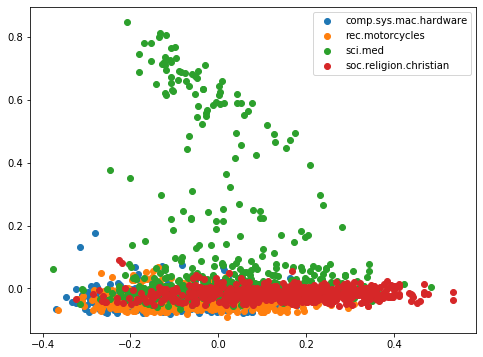

In [446]:
# <TODO> Select the dimensions to visualize
x_axis_data = Z[:,0]
y_axis_data = Z[:,1]

# Visualize (you should not need to modify this.)
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    x_ = x_axis_data[y == label]
    y_ = y_axis_data[y == label]
    plt.scatter(x_, y_, label=newsgroups_train.target_names[label])
plt.legend();

## 4. Visualizing the principal components (3 points)

We will 'visualize' each principal component by printing its highest-weighted tokens.

In [447]:
# <TODO> uncomment below. Retrieve W
W = pca.components_
W.shape

(4, 1771)

In [448]:
idx_to_token = {
    idx: token 
    for token, idx in tfidf_vectorizer.vocabulary_.items()
}

# For each component...
for i in range(q):
    sorted_idxs = np.argsort(W[i])

    print('--- Component %d' % i)
    # <TODO> print out the tokens with the top-10 highest weights 
    #        for this component.
    for jj in sorted_idxs[-10:]:
        print ('{} ({:0.6f})'.format(idx_to_token[jj], W[0,jj]))

--- Component 0
not (0.121831)
we (0.130983)
in (0.140311)
god (0.149258)
is (0.185458)
and (0.188487)
to (0.233587)
that (0.235554)
of (0.272942)
the (0.487690)
--- Component 1
n3jxp (-0.005530)
chastity (-0.005530)
shameful (-0.005335)
cadre (-0.005335)
dsl (-0.005335)
cs (-0.018113)
gordon (-0.015596)
banks (-0.015320)
geb (-0.016022)
pitt (-0.019238)
--- Component 2
not (0.121831)
hell (0.033377)
christians (0.053408)
faith (0.044863)
that (0.235554)
his (0.080540)
jesus (0.073274)
he (0.115787)
we (0.130983)
god (0.149258)
--- Component 3
uga (-0.004927)
georgia (-0.008641)
apple (-0.037457)
ai (-0.012508)
god (0.149258)
university (-0.040769)
of (0.272942)
mac (-0.048691)
edu (-0.092635)
the (0.487690)


## Non-negative Matrix Factorization (NMF) (10 points)

Now your task is to use NMF:
- Use the `sklearn.decomposition.NMF` class to find a low-dimensional representation of the data
- Print out the 10 highest-weighted tokens according to each row of the weight matrix `W`

_The overall pattern should be similar to steps (2) and (4) that you did above._

Use `q=10`:

In [449]:
tfidf_vectorizer = TfidfVectorizer(min_df=30)
X = tfidf_vectorizer.fit_transform(newsgroups_train.data).todense()

q = 10

X_min = np.min(X)
X = X - X_min

In [450]:
import numpy as np
from sklearn.decomposition import NMF

nmf = NMF(n_components=q, init='random', random_state=0)
Z = nmf.fit_transform(X)
W = nmf.components_


In [451]:
W.shape, Z.shape

((10, 1771), (2369, 10))

In [452]:
idx_to_token = {
    idx: token 
    for token, idx in tfidf_vectorizer.vocabulary_.items()
}

# For each component...
for i in range(q):
    insens_idx = np.argsort(W[i, :])

    print ('COMPONENT ' + str(i))
    print (' '.join([idx_to_token[w_ix] for w_ix in insens_idx[-10:]]) + '\n')  # 10 most active words in each of the components of W

COMPONENT 0
it by on is that was and in of the

COMPONENT 1
inc nec east behanna hp writes article in sun com

COMPONENT 2
state lines subject from organization posting host nntp university edu

COMPONENT 3
n3jxp cadre dsl shameful edu cs gordon banks geb pitt

COMPONENT 4
monitor quadra with scsi se to drive apple the mac

COMPONENT 5
it is the that superstition chinese sensitivity dyer food msg

COMPONENT 6
your ca on and it my the bike to you

COMPONENT 7
in be are this it that and of is to

COMPONENT 8
intelligence aisun3 programs athens michael mcovingt covington uga georgia ai

COMPONENT 9
his jesus not is you he that to we god

